In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

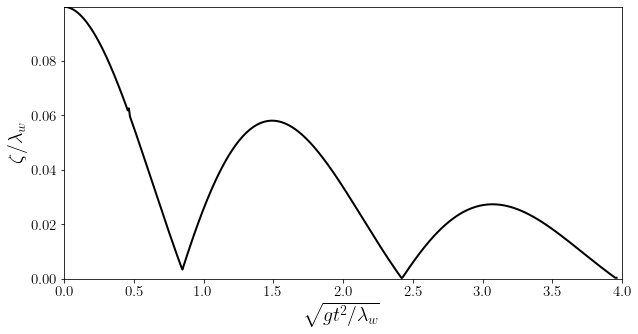

In [2]:
df = pd.read_csv('WavesWater/amplitude.dat', sep=' ')
df.head()
fig, ax = plt.subplots(1, 1, figsize=(10,5))

Ga = 1e4
t = df['t']
Amp = df['AmpOcean']
A0 = Amp[0]

ax.plot(t, Amp, 'k-', lw=2)

omega = np.sqrt(2*np.pi)
W = np.sqrt((omega)**2 - (4/Ga)*(2*np.pi)**4)
Ath = A0*np.exp(-(2/np.sqrt(Ga))*((2*np.pi)**2)*t)*np.cos(W*t)

# ax.plot(t, abs(Ath), 'r--', lw=2)

ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=20)
ax.set_ylabel(r'$\zeta/\lambda_w$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)

ax.set_xlim([0., 4.0])
ax.set_ylim([0., A0])

# ax.set_xscale('log')

plt.show()

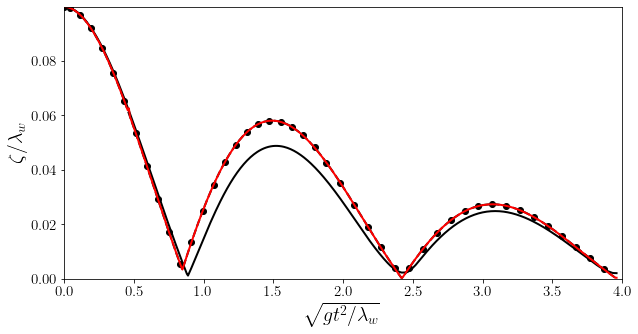

In [3]:
df = pd.read_csv('ViscousOilOnWaterWaves/amplitude.dat', sep=' ')
df.head()
fig, ax = plt.subplots(1, 1, figsize=(10,5))

Ga = 1e4
t = df['t']
AmpOcean = df['AmpOcean']
A0 = AmpOcean[0]

ax.plot(t, AmpOcean, 'k-', lw=2)

AmpIce = df['AmpIce']
ax.plot(t, AmpIce, 'k--', lw=2, marker='o', markevery=10)

df = pd.read_csv('WavesWater/amplitude.dat', sep=' ')
t = df['t']
Amp = df['AmpOcean']
A0 = Amp[0]

ax.plot(t, Amp, 'r-', lw=2)

omega = np.sqrt(2*np.pi)
W = np.sqrt((omega)**2 - (4/Ga)*(2*np.pi)**4)
Ath = A0*np.exp(-(2/np.sqrt(Ga))*((2*np.pi)**2)*t)*np.cos(W*t)

# ax.plot(t, abs(Ath), 'r--', lw=2)

ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=20)
ax.set_ylabel(r'$\zeta/\lambda_w$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)

ax.set_xlim([0., 4.0])
ax.set_ylim([0., A0])

# ax.set_xscale('log')

plt.show()

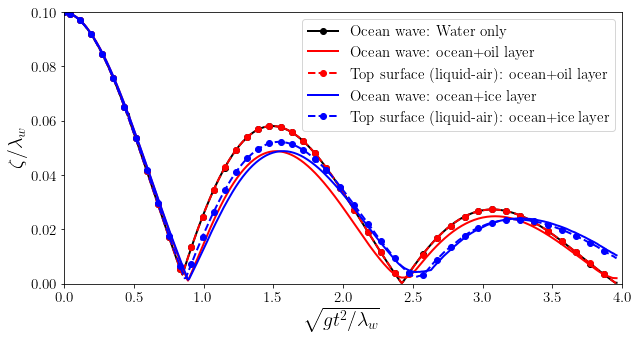

In [6]:
A0 = 0.1

df1 = pd.read_csv('WavesWater/amplitude.dat', sep=' ')
df2 = pd.read_csv('ViscousOilOnWaterWaves/amplitude.dat', sep=' ')
df3 = pd.read_csv('IceOnWaterWaves/amplitude.dat', sep=' ')

fig, ax = plt.subplots(1, 1, figsize=(10,5))

t = df1['t']
AmpOcean = df1['AmpOcean']
ax.plot(t, AmpOcean, 'k-', lw=2, marker='o', markevery=10, label='Ocean wave: Water only')

t = df2['t']
Amp = df2['AmpOcean']
AmpIce = df2['AmpIce']

ax.plot(t, Amp, 'r-', lw=2, label='Ocean wave: ocean+oil layer')
ax.plot(t, AmpIce, 'r--', lw=2, marker='o', markevery=10, label='Top surface (liquid-air): ocean+oil layer')


t = df3['t']
Amp = df3['AmpOcean']
AmpIce = df3['AmpIce']

ax.plot(t, Amp, 'b-', lw=2, label='Ocean wave: ocean+ice layer')
ax.plot(t, AmpIce, 'b--', lw=2, marker='o', markevery=10, label='Top surface (liquid-air): ocean+ice layer')


ax.set_xlabel(r'$\sqrt{gt^2/\lambda_w}$', fontsize=20)
ax.set_ylabel(r'$\zeta/\lambda_w$', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)

ax.set_xlim([0., 4.0])
ax.set_ylim([0., A0])

ax.legend(loc='best', fontsize=15)

plt.savefig('amplitude.pdf', bbox_inches='tight')

plt.show()